In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense, Input
from keras.models import Model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('card_transdata.csv')

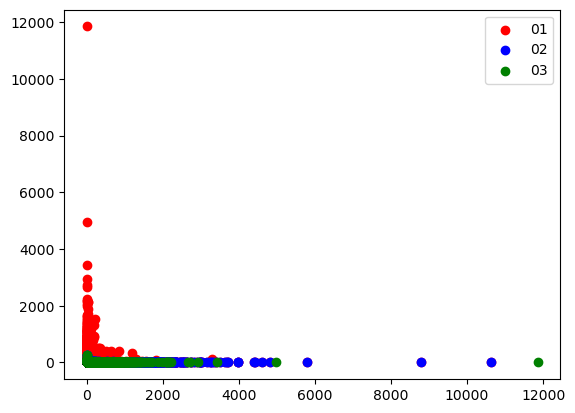

{'whiskers': [<matplotlib.lines.Line2D at 0x195049a4af0>,
 'caps': [<matplotlib.lines.Line2D at 0x195049a5030>,
 'boxes': [<matplotlib.lines.Line2D at 0x195049a4850>],
 'medians': [<matplotlib.lines.Line2D at 0x195049a5570>],
 'fliers': [<matplotlib.lines.Line2D at 0x195049a5810>],
 'means': []}

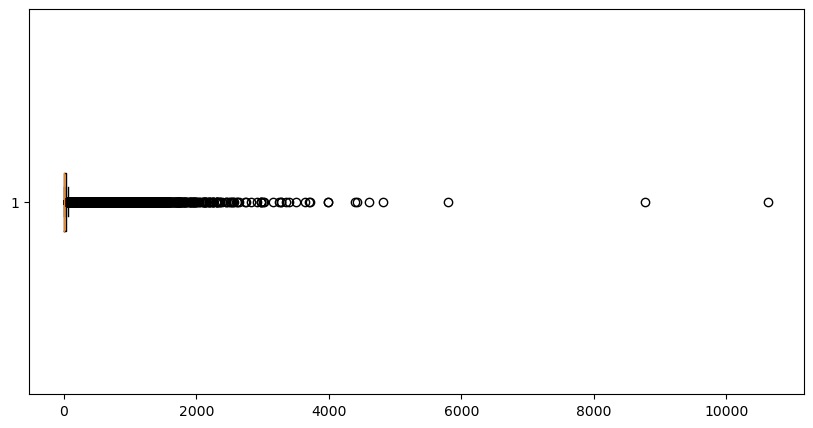

In [24]:
X1 = df['distance_from_home']
X2 = df['distance_from_last_transaction']
X3 = df['ratio_to_median_purchase_price']
plt.scatter(X1, X2, color='red', label='01')
plt.scatter(X1, X3, color='blue', label='02')
plt.scatter(X2, X3, color='green', label='03')
plt.legend()
plt.show()
fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(df['distance_from_home'], vert=False)

In [3]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [4]:
sc = StandardScaler()
x  =sc.fit_transform(x)

In [17]:
input_layer = Input(shape=(7,))
encoded = Dense(7, activation = 'relu')(input_layer)
encoded = Dense(7, activation = 'relu')(encoded)
encoded = Dense(4, activation = 'relu')(encoded)
decoded = Dense(7, activation = 'relu')(encoded)
decoded = Dense(7, activation = 'relu')(decoded)

In [18]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [19]:
autoencoder.fit(x, x, epochs = 10, batch_size=62, shuffle=False)

Epoch 1/10
16130/16130 [==============================] - 22s 1ms/step - loss: 0.5114
Epoch 2/10
16130/16130 [==============================] - 21s 1ms/step - loss: 0.4797
Epoch 3/10
16130/16130 [==============================] - 23s 1ms/step - loss: 0.4797
Epoch 4/10
16130/16130 [==============================] - 22s 1ms/step - loss: 0.4797
Epoch 5/10
16130/16130 [==============================] - 22s 1ms/step - loss: 0.4797
Epoch 6/10
16130/16130 [==============================] - 22s 1ms/step - loss: 0.4797
Epoch 7/10
16130/16130 [==============================] - 22s 1ms/step - loss: 0.4797
Epoch 8/10
16130/16130 [==============================] - 23s 1ms/step - loss: 0.4797
Epoch 9/10
16130/16130 [==============================] - 23s 1ms/step - loss: 0.4796
Epoch 10/10
16130/16130 [==============================] - 23s 1ms/step - loss: 0.4796


In [20]:
threshold = 0.5
mse = np.mean(np.power(x - autoencoder.predict(x),2), axis=1)
y_pred = (mse > threshold).astype(int)
print('MSE:',mse)

31250/31250 [==============================] - 33s 1ms/step
MSE: [0.30594743 0.39669947 0.16711066 ... 0.10372361 0.16701176 0.07759725]


In [21]:
fpr, tpr, thresholds = roc_curve(y, mse)
roc_auc = auc(fpr,tpr)

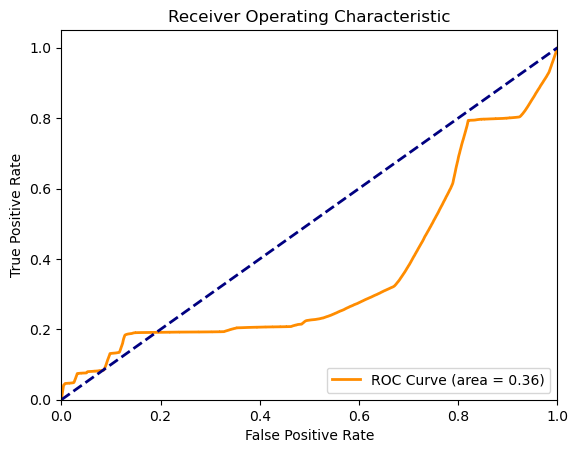

AUC: 0.35757160254728837


In [22]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print('AUC:', roc_auc)